## Análisis - Bundesliga temporada 2015/2016 (masculina)

Vamos a hacer un análisis de las distintas competiciones (las cinco grandes ligas durante la temporada 2015-2016 y de todos los partidos en general) para poder entender que características son más importantes a la hora de tomar la decisión por parte del modelo de ML para decidir si el equipo va a ganar, perder o empatar el partido.

En este notebook en cuestión, vamos a analizar la Bundesliga en la temporada 2015/2016 (masculina).

Cargamos los datos de los partidos sobre la competición para entrenar el modelo y poder hacer el estudio de explicabilidad.

In [1]:
import os
import pandas as pd


competition_name = "1. Bundesliga"
competition_gender = "male"
season_name = "2015/2016"
season_name_for_filename = "2015_2016"

output_dir = "data/reduced/"
filename = f"{competition_name}({season_name_for_filename}_{competition_gender})_reduced.csv"
output_path = os.path.join(output_dir, filename)

if os.path.exists(output_path):
    print(f"Matches from the competition loaded from {output_path}")
    matches_in_Bundesliga = pd.read_csv(output_path)
else:
    print("You don't have data from the competition yet. Please run the notebook '0_datasets_building.ipynb' first.")

Matches from the competition loaded from data/reduced/1. Bundesliga(2015_2016_male)_reduced.csv


In [2]:
matches_in_Bundesliga.head(5)

,match_id,shots_on_target_ratio_home,shots_on_target_ratio_away,average_shots_on_target_distance_home,average_shots_on_target_distance_away,shots_inside_area_ratio_home,shots_inside_area_ratio_away,pass_success_ratio_home,pass_success_ratio_away,cross_success_ratio_home,...,percentage_shots_under_pressure_home,percentage_shots_inside_area_under_pressure_home,percentage_passes_under_pressure_home,percentage_passes_inside_area_under_pressure_home,percentage_set_piece_shots_home,percentage_set_piece_shots_inside_area_home,percentage_substitutions_home,percentage_tactical_substitutions_home,percentage_tactical_changes_home,percentage_formation_changes_home
0,3890267,0.375000,0.461538,16.622853,13.820947,0.750000,0.692308,0.832013,0.755051,0.250000,...,0.250000,0.400000,0.574713,0.50,0.266667,0.300000,0.5,0.5,0.500000,0.000000
1,3890265,0.150000,0.272727,20.255117,17.607160,0.500000,0.545455,0.772727,0.828261,0.318182,...,0.769231,0.750000,0.441718,0.75,0.680000,0.727273,0.5,0.5,0.500000,0.666667
2,3890264,0.133333,0.312500,26.271612,17.542449,0.333333,0.500000,0.767241,0.704301,0.200000,...,0.500000,0.400000,0.595376,1.00,0.476190,0.500000,0.5,0.6,0.333333,0.500000
3,3890263,0.272727,0.357143,18.619963,21.381858,0.454545,0.428571,0.688000,0.620690,0.214286,...,0.444444,0.571429,0.502924,0.50,0.458333,0.454545,0.5,0.5,1.000000,1.000000
4,3890262,0.272727,0.357143,20.860604,15.628223,0.818182,0.428571,0.490909,0.657431,0.300000,...,0.222222,0.250000,0.375000,0.60,0.400000,0.600000,0.5,0.5,0.200000,0.000000


Una vez ya tenemos los datos cargados, entrenamos el mejor modelo (seleccionado tras la experimentación) y mostramos sus resultados.

In [3]:
from src.analysis import bundesliga_best_model

best_model_Bundesliga, evaluation_metrics, X_train_Bundesliga, X_test_Bundesliga, encoder_Bundesliga, match_ids_test = bundesliga_best_model(matches_in_Bundesliga)
print(f"The best model for Bundesliga is {best_model_Bundesliga}")
print(f"The evaluation metrics for the best model are:")
evaluation_metrics.head()

The best model for Bundesliga is RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, max_features=None, n_estimators=11,
                       random_state=42)
The evaluation metrics for the best model are:


,Train Accuracy,Test Accuracy,Precision Macro,Precision Weighted,Recall Macro,Recall Weighted,F1 Macro,F1 Weighted
Random Forest,0.868852,0.66129,0.652339,0.677773,0.642593,0.66129,0.64054,0.6634


Una vez ya tenemos el mejor modelo entrenado comenzamos el análisis de explicabilidad.

### Estudio global

Vamos a comenzar por un estudio global. 

En este caso, al ser el mejor modelo Random Forest, nos basaremos en la importancia de las características proporcionada por el modelo a través del método `feature_importances_`.
- A diferencia de la regresión logística, que asigna coeficientes específicos a cada clase, Random Forest evalúa la relevancia de cada variable para el modelo en su conjunto, sin distinguir entre clases.
- Este modelo captura tanto relaciones lineales como no lineales, permitiendo analizar interacciones entre múltiples factores y su impacto en la predicción del resultado.
- Sin embargo, no indica la dirección del efecto de cada característica (positiva o negativa), sino únicamente su importancia relativa en el rendimiento del modelo.

El gráfico presentado a continuación muestra la importancia global de cada característica en la predicción de los resultados de los partidos en la Bundesliga.
- Valores más altos indican que una característica tiene mayor peso en las predicciones del modelo.
- Valores cercanos a cero indican que la característica no aporta información significativa para la clasificación del resultado.

Este análisis nos permite identificar qué factores son clave en la predicción del resultado de los partidos, considerando relaciones más complejas y capturando patrones que un modelo lineal no podría detectar.

Features with zero importance across all classes:
['pass_success_ratio_away', 'tackles_success_ratio_home', 'tackles_success_ratio_away', 'possession_percentage_away', 'is_valid_last_3_matches_form_home', 'win_rate_last_5_matches_home', 'is_valid_win_rate_last_5_matches_home', 'win_last_home_match_home_team', 'is_valid_win_last_home_match_home_team', 'win_last_away_match_away_team', 'is_valid_win_last_away_match_away_team', 'is_valid_goals_conceded_last_match_home', 'goals_conceded_last_match_away', 'is_valid_goals_conceded_last_match_away', 'goals_scored_last_match_home', 'is_valid_goals_scored_last_match_home', 'goals_scored_last_match_away', 'is_valid_goals_scored_last_match_away', 'is_valid_std_shots_last_3_matches_home', 'is_valid_std_shots_last_3_matches_away', 'percentage_shots_foot_home', 'percentage_shots_head_home', 'percentage_shots_other_home', 'percentage_recoveries_home', 'percentage_50_50_won_home', 'percentage_penaltys_committed_home', 'percentage_red_cards_home', 'perc

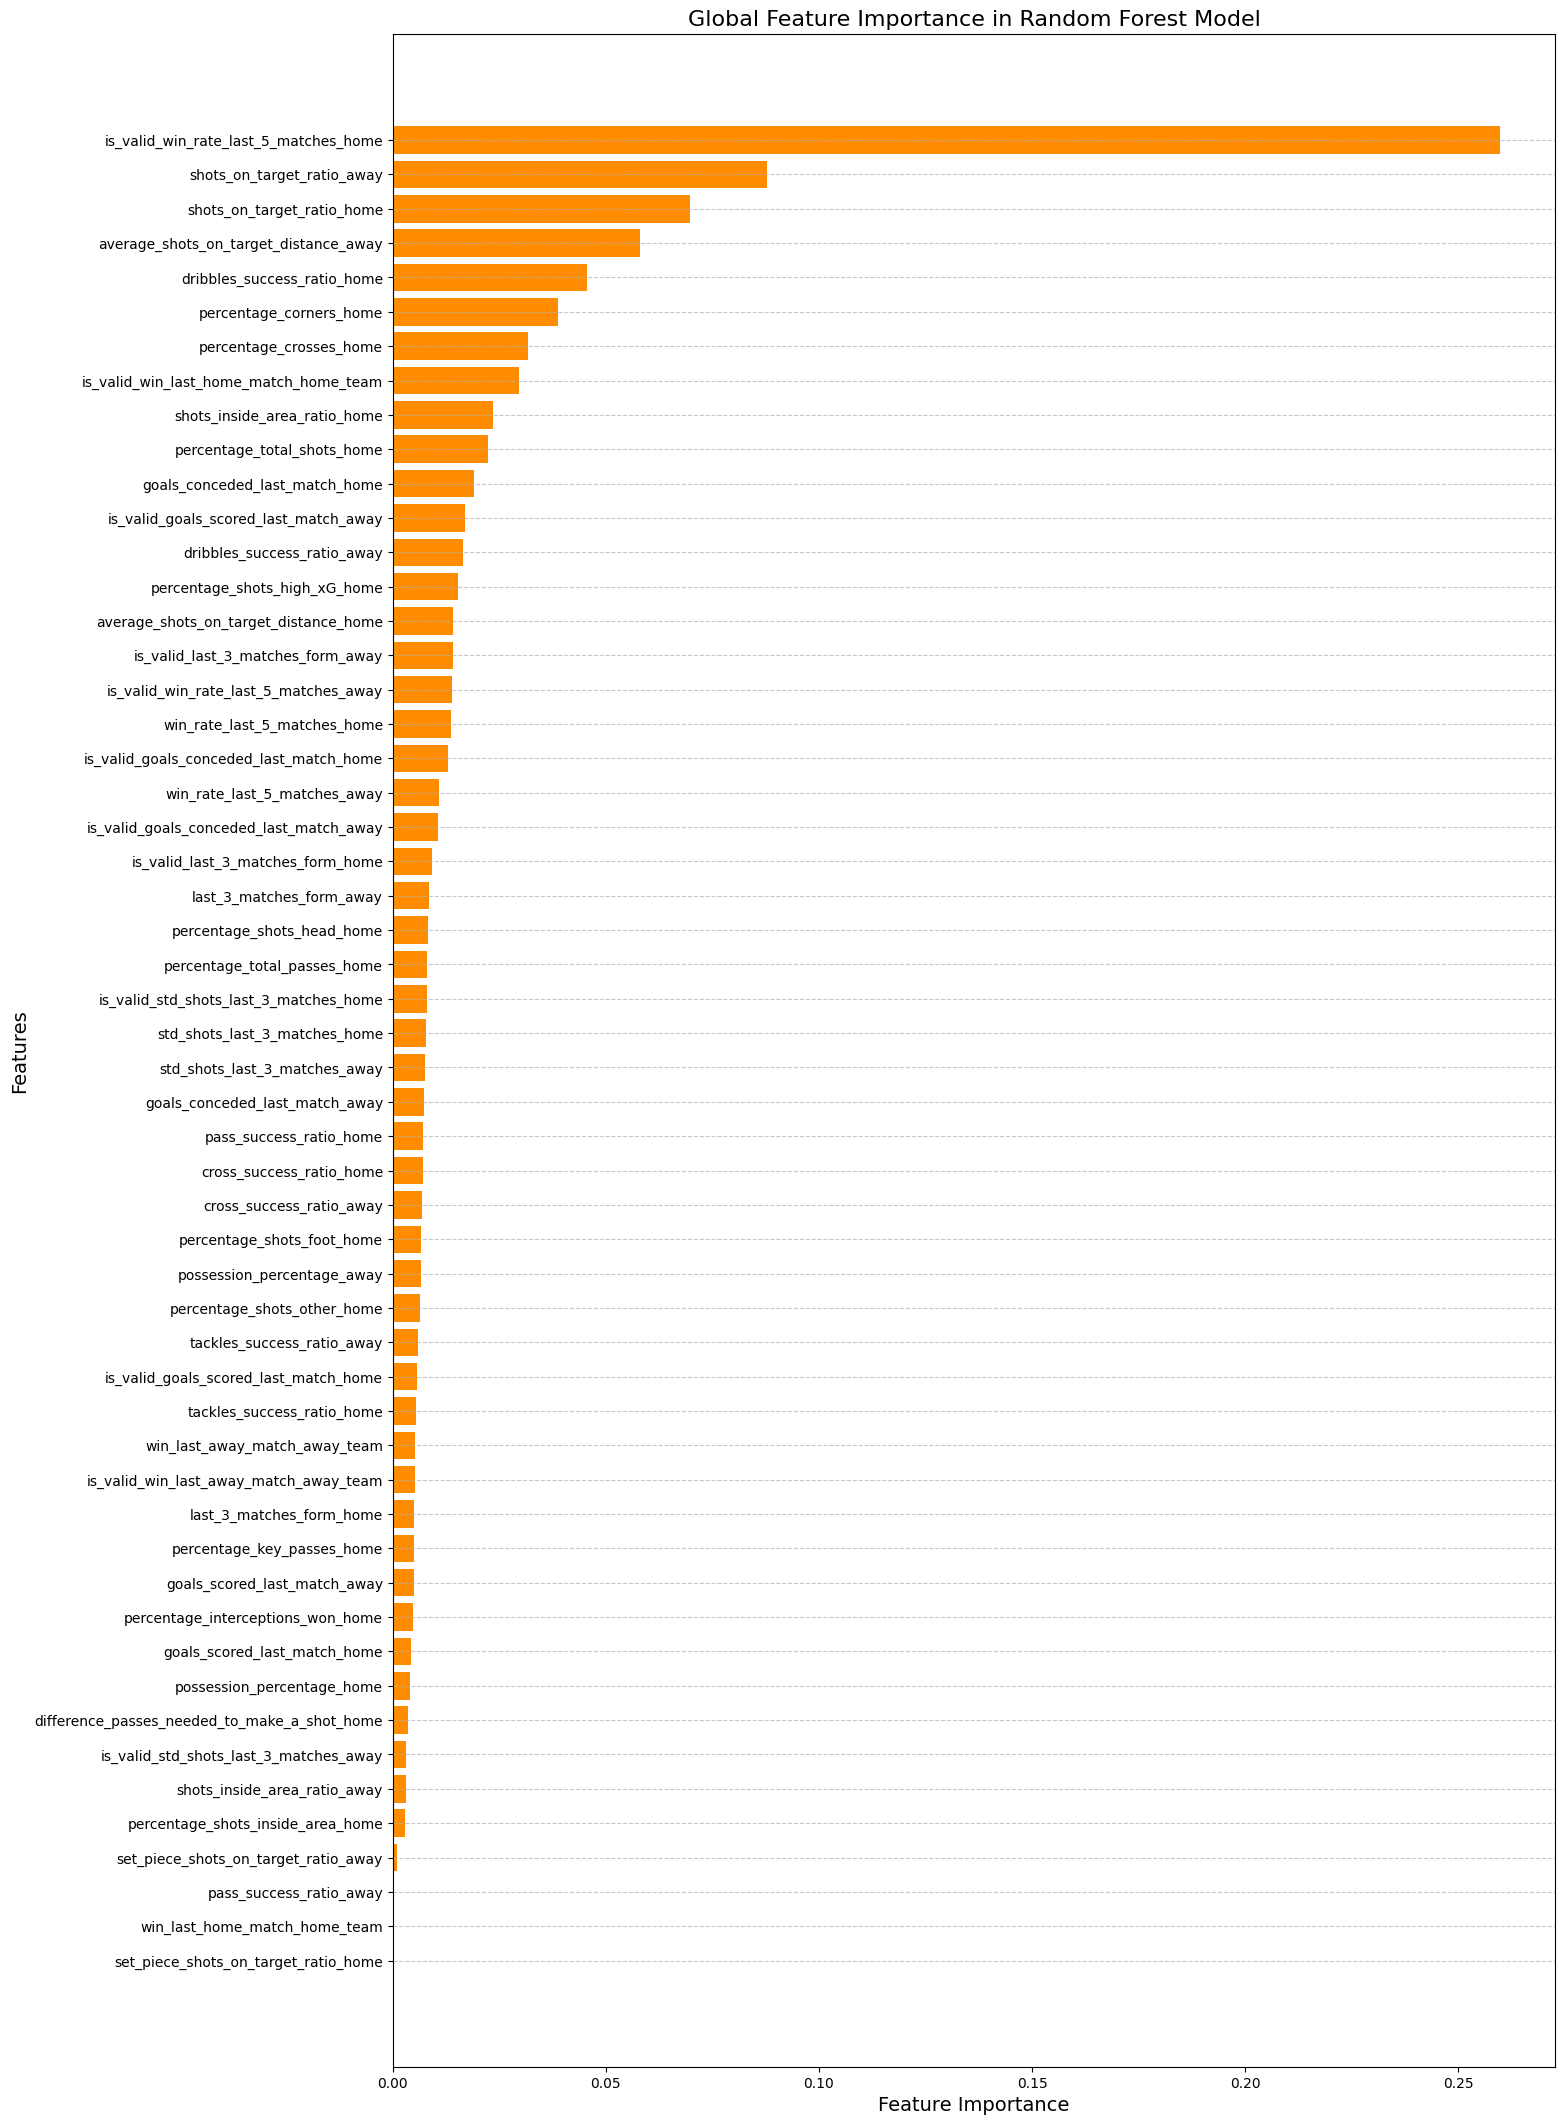

In [4]:
from src.analysis import random_forest_global_analysis

random_forest_global_analysis(best_model_Bundesliga)

El modelo Random Forest ha determinado la relevancia de cada característica en la predicción del resultado de los partidos en la Bundesliga. A diferencia de la Regresión Logística, aquí se mide la importancia relativa de cada variable para el modelo en su conjunto, sin distinguir entre clases específicas (victoria local, empate o victoria visitante). Vamos a analizar el gráfico:

- **Caracterísiticas más importantes en la predicción**: Las características con mayor importancia en el modelo son aquellas que han tenido un impacto significativo en la clasificación del resultado del partido. Aunque no podemos determinar si una variable favorece a un equipo u otro, sí podemos intuir que estas características han sido relevantes en la toma de decisiones del modelo.
    - `is_valid_win_rate_last_5_matches_home`: La validez del rendimiento reciente del equipo local es la característica más influyente en la predicción del modelo. Esto sugiere que la forma en la que el equipo ha jugado en sus últimos cinco partidos ha sido un patrón relevante en la determinación de los resultados.
    - `shots_on_target_ratio_away` y `shots_on_target_ratio_home`: La precisión en los disparos a puerta del equipo local y del visitante son unas de las métricas más destacadas. Esto sugiere que la capacidad del equipo local o visitante para generar tiros precisos ha sido un aspecto clave en los partidos analizados.
    - `average_shots_on_target_distance_home` y `average_shots_on_target_distance_away`: La distancia promedio desde la que el equipo local o visitante realiza sus tiros a puerta también ha sido una variable relevante. Esto podría indicar que los equipos que intentan disparos desde distancias más cortas o largas han mostrado ciertos patrones que el modelo ha identificado como significativos.
    - `dribbles_success_ratio_home`, `dribbles_success_ratio_home`: El éxito en los regates del equipo local ha sido una característica importante. Esto sugiere que la capacidad del equipo para superar defensas mediante el regate ha tenido un impacto en los resultados de los partidos analizados.
    - `percentage_corners_home` y `percentage_crosses_home`: El número de saques de esquina y la frecuencia de centros han sido considerados aspectos relevantes por el modelo. Esto podría indicar que los equipos que generan más jugadas ofensivas desde las bandas han tenido un impacto en la predicción del resultado.
    - `is_valid_win_last_home_match_home_team`: La validez del último partido en casa del equipo local ha sido una variable destacada. Esto sugiere que la forma reciente en su estadio puede estar relacionada con los patrones de victoria o desempeño del equipo.
    - `shots_inside_area_ratio_home`: La proporción de tiros dentro del área del equipo local es otro de los factores importantes en la clasificación del modelo. Los disparos dentro del área suelen estar asociados con una mayor probabilidad de gol, lo que podría explicar su relevancia en la predicción.
    - `percentage_total_shots_home`: El volumen total de disparos del equipo local también ha sido una métrica destacada. Esto sugiere que la cantidad de intentos ofensivos puede estar vinculada a los patrones que el modelo ha identificado como influyentes en los partidos.
    - `goals_conceded_last_match_home`: La cantidad de goles concedidos por el equipo local en su último partido ha sido una característica relevante. Esto podría indicar que la solidez defensiva reciente ha sido un factor tenido en cuenta en la clasificación del modelo.
    - `is_valid_goals_scored_last_match_away`: La validez de los goles anotados por el equipo visitante en su último partido toma importancia en la clasificación del modelo. Esto sugiere que la forma reciente ofensiva del equipo visitante es importantes a la hora de que el modelo tome una decisión.
    - `percentage_shots_high_xG_home`: Los tiros con una alta probabilidad de gol por parte de los equipos es una métrica destacada. Esto sugiere que el porcentaje de anotar goles en los tiros por parte de ambos equipo toma importancia a la hora de tener que clasificar el resultado del partido.
    - `win_rate_last_5_matches_home` y :`win_rate_last_5_matches_away` El rendimiento reciente del equipo local y visitante ha sido identificado como un factor relevante. Esto indica que los resultados obtenidos en los últimos encuentros han tenido una relación con el desenlace de los partidos en la competición.
    - `percentage_shots_head_home`: El porcentaje de tiros de cabeza de los equipos en el partido parece identificarse como una métrica relevante a la hora de tomar una decisión en la clasificación del resultado de partido por parte del modelo.
    - `percentage_total_passes_home`: El porcentaje de pases de ambos equipos en el partido también se considera una métrica relevante para tomar una decisión acerca de la clasificación del resultado del partido por parte del modelo.

- **Características sin importancia en la predicción**: El modelo ha determinado que varias características no aportan información relevante en la clasificación del resultado del partido. Esto no significa que estas variables no tengan influencia en el fútbol en la Bundesliga, sino que, dentro de los datos analizados, el modelo no ha encontrado una relación clara con los resultados.
   - **Factores relacionados con el rendimiento reciente**: Métricas como `win_last_home_match_home_team`, `win_last_away_match_away_team` y `goals_scored_last_match_home` han sido consideradas irrelevantes en la predicción. Esto indica que, aunque el rendimiento pasado de un equipo es un aspecto importante en el análisis futbolístico, el modelo no ha encontrado una relación clara entre estos factores y el resultado final del partido.
    - **Estadísticas defensivas y disciplinares**: 
        - El modelo ha descartado métricas defensivas como `tackles_success_ratio_home`, `tackles_success_ratio_away`, `percentage_recoveries_home` y `percentage_shots_inside_area_under_pressure_home`. Esto sugiere que estos factores no han mostrado una correlación fuerte con los resultados de los partidos en la Bundesliga.
        - Asimismo, métricas relacionadas con la disciplina, como `percentage_red_cards_home`, `percentage_penaltys_committed_home` y `percentage_yellow_cards_home`, no han sido consideradas relevantes en la predicción del modelo. Esto podría indicar que las expulsiones y las faltas, aunque son eventos que pueden cambiar el curso de un partido, no han mostrado un patrón consistente en los datos analizados.
    - **Métricas del estilo de juego**: Es bastante impactante como métricas como `difference_passes_needed_to_make_a_shot_home`, `possession_percentage_home` y `possession_percentage_away` toman tan poca relevancia en la predicción del resultado, siendo métricas que expresan el estilo de juego de los equipos del partido.
    - **Métricas ofensivas**: ALgunas métricas como `shots_inside_area_ratio_away`, `set_piece_shots_on_target_ratio_home`, `set_piece_shots_on_target_ratio_away` o `percentage_shots_inside_area_ratio_home` toman poca importancia a la hora de clasificar el resultado por parte del modelo.
    - **Otros factores tácticos y de juego**: El modelo también ha descartado variables como `percentage_tactical_substitutions_home`, `percentage_pressures_home` y `percentage_passes_under_pressure_home`, lo que sugiere que estos factores tácticos no han sido determinantes en la clasificación del resultado del partido.

**Conclusiones generales**: 

El modelo Random Forest ha identificado que los factores más influyentes en la predicción del resultado en la Bundesliga están relacionados con la eficiencia ofensiva, la generación de oportunidades y el rendimiento reciente de los equipos. En particular, la precisión en los tiros a puerta, el volumen de disparos y la forma reciente del equipo han sido los indicadores clave en la clasificación del resultado del partido.

Por otro lado, aspectos tradicionalmente considerados fundamentales en el análisis futbolístico, como la posesión del balón, los tackles defensivos o la disciplina en el juego, no han mostrado una correlación clara con los resultados. Esto sugiere que en la Bundesliga, la victoria no está necesariamente vinculada a la posesión o la solidez defensiva, sino a la efectividad en la generación y finalización de oportunidades.

El hecho de que métricas relacionadas con el juego por bandas y las jugadas a balón parado hayan sido relevantes sugiere que estas estrategias pueden desempeñar un papel importante en la Bundesliga. Los equipos que logran generar oportunidades a través de centros y saques de esquina parecen haber influido en los resultados de los partidos.

Finalmente, es importante recordar que aunque ciertas características han sido identificadas como más importantes que otras, el modelo no indica en qué dirección afectan el resultado. Es decir, aunque una variable como shots_on_target_ratio_away sea relevante, no podemos determinar si su aumento favorece más a los equipos visitantes o si simplemente es un factor clave en la dinámica de los partidos de la Bundesliga.

En conclusión, este análisis nos proporciona una visión clara de qué aspectos han sido más utilizados en la clasificación de los partidos de la Bundesliga y nos ayuda a comprender mejor cuáles son los patrones más influyentes en la competición, ofreciendo una base sólida para el análisis de partidos en el fútbol alemán.